### <p style="text-align: right;"> &#9999; Krrish Kishore Kumar</p>


# 21E - Outliers

What are outliers? Talk about this with the person to your left and right. Make sure that you are comfortable with your understanding. If not, do a little research to clarify.

Data will often contain outliers. You have to decide if the outlier is caused by a human error, such as a typo, or if it is valid data. Importantly, you need to decide if the outliers will be considered in the analysis.

**Think about some of the implications of including non-valid outliers or of excluding valid ones. These can have serious impacts on the accuracy of your results.**


**Look back at 21D and your box plots for the 9 wards. Do you think there are any outliers in this datafile on the Flint water? How could you determine if there are outliers? If there are, what do you think could be the cause of any of these outliers?** 

<font size=+2>&#9999;</font> I think there are a few outliers, namely in ward 6, 3, and 2. To determine if there are outliers, I can use the IQR method, where I calculate the IQR and then multiply it by 1.5 to get the upper and lower bounds. If any data points are outside of these bounds, then they are considered outliers. The cause of these outliers could be due to human error, such as a typo, or it could be due to the lead leaks in different houses. 

# Pause at this point and have a discussion on the information below.


What are some of the challenges with box plots in identifying and understanding outliers?

<font size=+2>&#9999;</font> The challenges with box plots in identifying and understanding outliers is that it is not always clear what is considered an outlier. The box plot only shows the data points that are within the upper and lower bounds, but it does not show the actual data points that are considered outliers. This makes it difficult to determine if the outliers are valid or not.

**Go back and look at your boxplots from assignment 21D. Do these show any outliers? How are these boxplots different from one another? How does that affect our perspective of outliers?**
Remember, how you analyze the data is as important as the data itself.

<font size=+2>&#9999;</font>  I think there are a few outliers, namely in ward 6, 3, and 2. The boxplots are different from one another because they show the distribution of the data points in each ward. This affects our perspective of outliers because it shows us where the data points are concentrated and where they are spread out.

How can we use masks in Pandas to address some of these issues? As you work through this **keep in mind what ward _you think_ the outliers are in**. Think about how this information might help make choices about how to address the water crisis.

**Develop masks to test specifically for outliers in the wards. Which test should you use 1,2, or 3 and should you use _ppb_ or _mg/L_? How did you decide? How would you determine what value to use as your mask? Explain your decision process here then write the code to display your outliers _by ward_.**

<font size=+2>&#9999;</font>  I would use test 3 because it is the most accurate way to determine if there are outliers in the data. I would use _ppb_ because it is the most accurate way to measure the lead levels in the water. I would determine the value to use as my mask by calculating the IQR and then multiplying it by 1.5 to get the upper and lower bounds. I would then use these bounds to determine if there are any outliers in the data. 

In [4]:
# Type your code here

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
flint = pd.read_csv("/workspaces/codespaces-jupyter/data/flint.csv")
flint.insert(4, "Pb Bottle 1 in mg/L", flint["Pb Bottle 1 (ppb) - First Draw"]/1000)
flint.insert(6, "Pb Bottle 2 in mg/L", flint["Pb Bottle 2 (ppb) - 45 secs flushing"]/1000)
flint.insert(8, "Pb Bottle 3 in mg/L", flint["Pb Bottle 3 (ppb) - 2 mins flushing"]/1000)

In [ ]:
# You should check for other outliers in the other sample as well.

#find iqr for each column in mg/L

IQR_1 = flint["Pb Bottle 1 in mg/L"].quantile(0.75) - flint["Pb Bottle 1 in mg/L"].quantile(0.25)
IQR_2 = flint["Pb Bottle 2 in mg/L"].quantile(0.75) - flint["Pb Bottle 2 in mg/L"].quantile(0.25)
IQR_3 = flint["Pb Bottle 3 in mg/L"].quantile(0.75) - flint["Pb Bottle 3 in mg/L"].quantile(0.25)

#masks for each column

flint1 = flint[(flint["Pb Bottle 1 in mg/L"] < (flint["Pb Bottle 1 in mg/L"].quantile(0.25) - 1.5*IQR_1)) | 
               (flint["Pb Bottle 1 in mg/L"] > (flint["Pb Bottle 1 in mg/L"].quantile(0.75) + 1.5*IQR_1))]

flint2 = flint[(flint["Pb Bottle 2 in mg/L"] < (flint["Pb Bottle 2 in mg/L"].quantile(0.25) - 1.5*IQR_2)) | 
               (flint["Pb Bottle 2 in mg/L"] > (flint["Pb Bottle 2 in mg/L"].quantile(0.75) + 1.5*IQR_2))]

flint3 = flint[(flint["Pb Bottle 3 in mg/L"] < (flint["Pb Bottle 3 in mg/L"].quantile(0.25) - 1.5*IQR_3)) | 
               (flint["Pb Bottle 3 in mg/L"] > (flint["Pb Bottle 3 in mg/L"].quantile(0.75) + 1.5*IQR_3))]

flint_outliers = pd.concat([flint1, flint2, flint3]).drop_duplicates()

flint_cleaned = flint[~flint['SampleID'].isin(flint_outliers['SampleID'])]

flint_cleaned.to_csv("flint_cleaned.csv", index=False)

### Which Wards are at risk for lead poisoning? What percentage fall within the Action Zone?
#### Run your analysis twice, first with the outliers and second without outliers.

**It is important to understand how the outliers impact your data analysis. The best way to do this is to run the analysis twice, one time with the outliers included and a second time without the outliers inlcuded.**

**Your goal in the following code is to determine how eliminating the outliers affects how you would use the ward information to address the water issues.**

In [18]:
b1percentage_cleaned = 1 - flint_cleaned["Pb Bottle 1 in mg/L"].between(0, 0.015).sum()/flint_cleaned["Pb Bottle 1 in mg/L"].count()
b2percentage_cleaned = 1 - flint_cleaned["Pb Bottle 2 in mg/L"].between(0, 0.015).sum()/flint_cleaned["Pb Bottle 2 in mg/L"].count()
b3percentage_cleaned = 1 - flint_cleaned["Pb Bottle 3 in mg/L"].between(0, 0.015).sum()/flint_cleaned["Pb Bottle 3 in mg/L"].count()

print(b1percentage_cleaned)
print(b2percentage_cleaned)
print(b3percentage_cleaned)
#percentage of points that fall within the action zone of 0.015 mg/L

0.02358490566037741
0.0
0.0


In [20]:
b3 = 1 - flint["Pb Bottle 1 in mg/L"].between(0, 0.015).count()/flint_cleaned["Pb Bottle 1 in mg/L"].count()
b2 = 1 - flint["Pb Bottle 2 in mg/L"].between(0, 0.015).count()/flint_cleaned["Pb Bottle 2 in mg/L"].count()
b1 = 1 - flint["Pb Bottle 3 in mg/L"].between(0, 0.015).count()/flint_cleaned["Pb Bottle 3 in mg/L"].count()

print(b1)
print(b2)
print(b3)

-0.27830188679245293
-0.27830188679245293
-0.27830188679245293


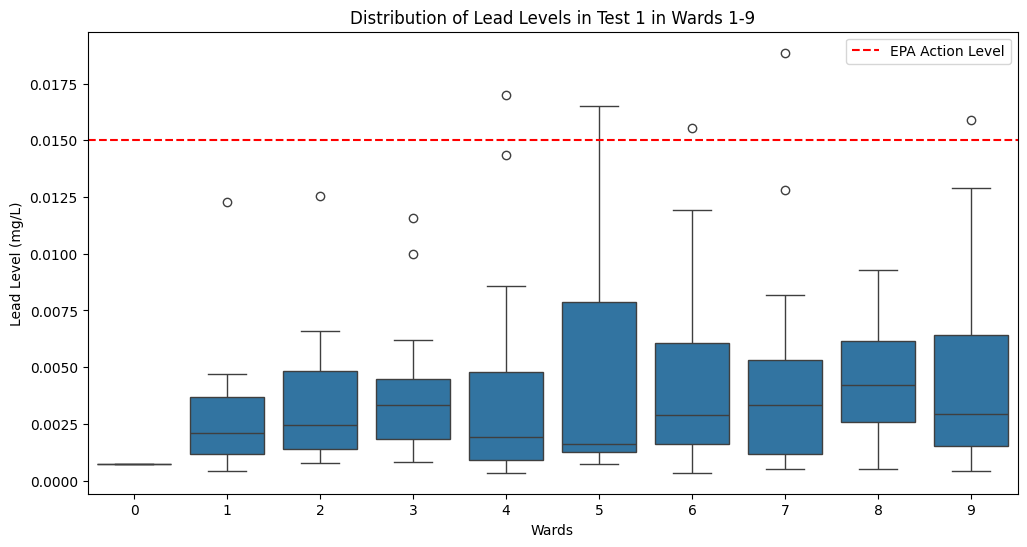

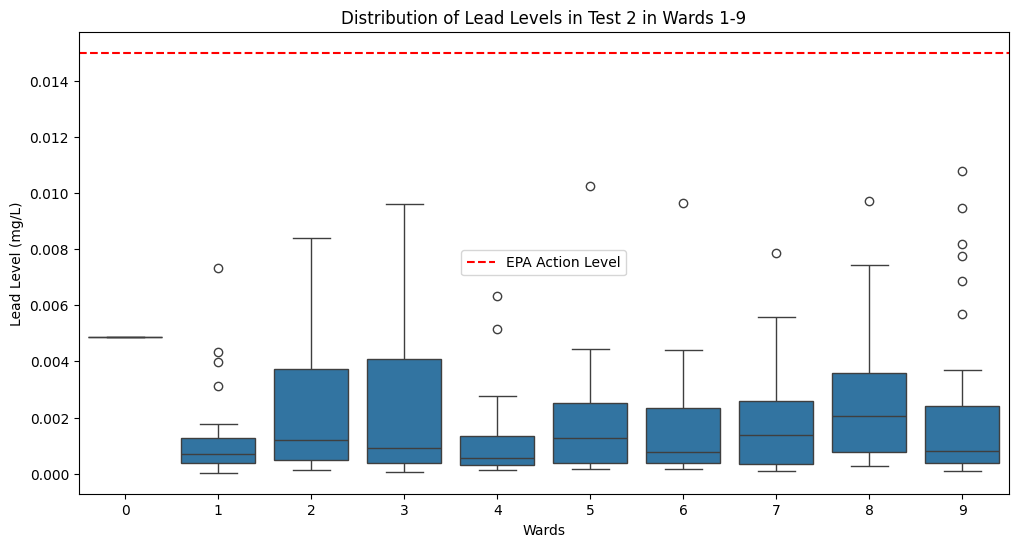

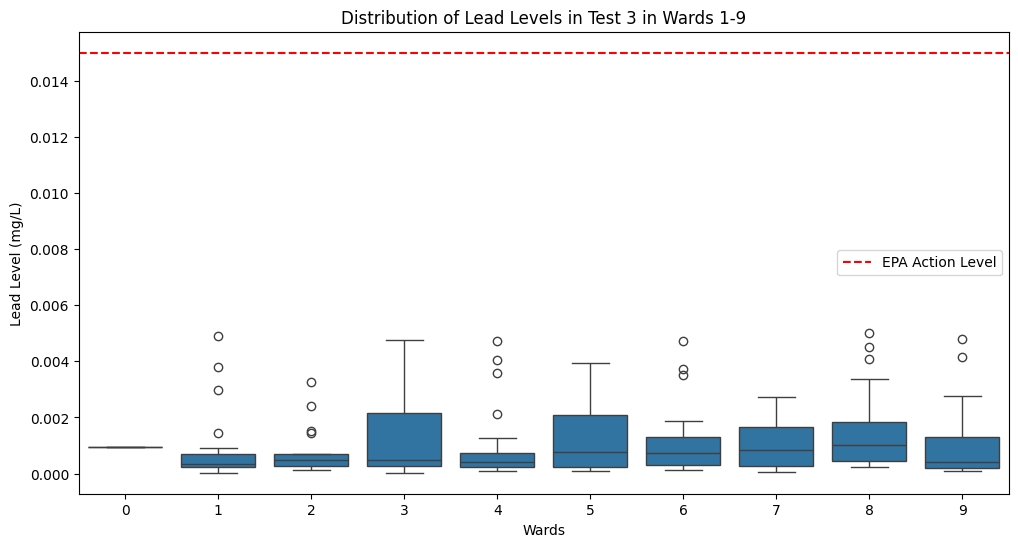

In [14]:
# put your code here!

# boxplots for cleaned data
for i in range(1,4):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Ward', y=f'Pb Bottle {i} in mg/L', data=flint_cleaned)
    plt.axhline(y=0.015, color='r', linestyle='--', label='EPA Action Level')
    plt.legend()
    plt.title(f'Distribution of Lead Levels in Test {i} in Wards 1-9')
    plt.xlabel('Wards')
    plt.ylabel('Lead Level (mg/L)')
    plt.show()

**Below is the 2nd analysis using the full dataframe**

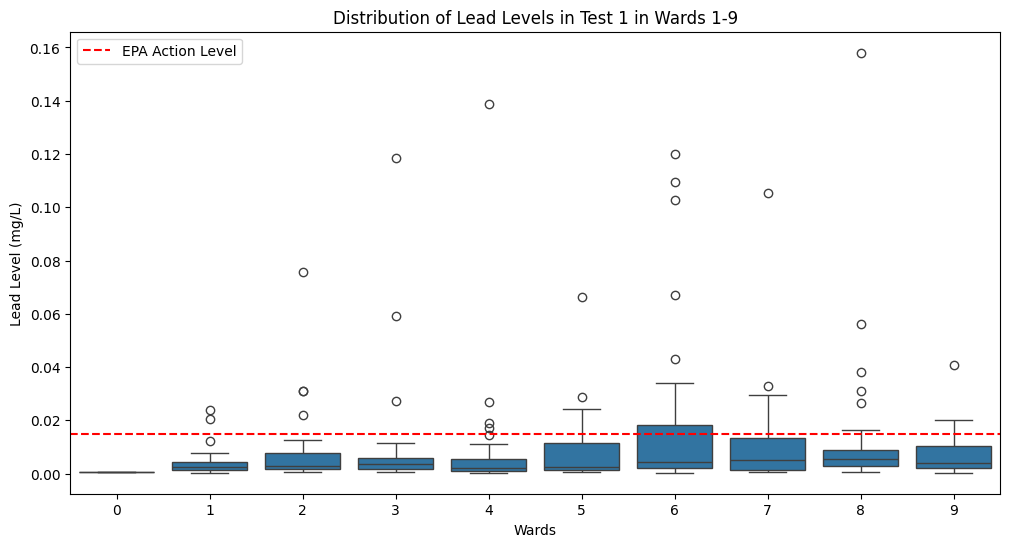

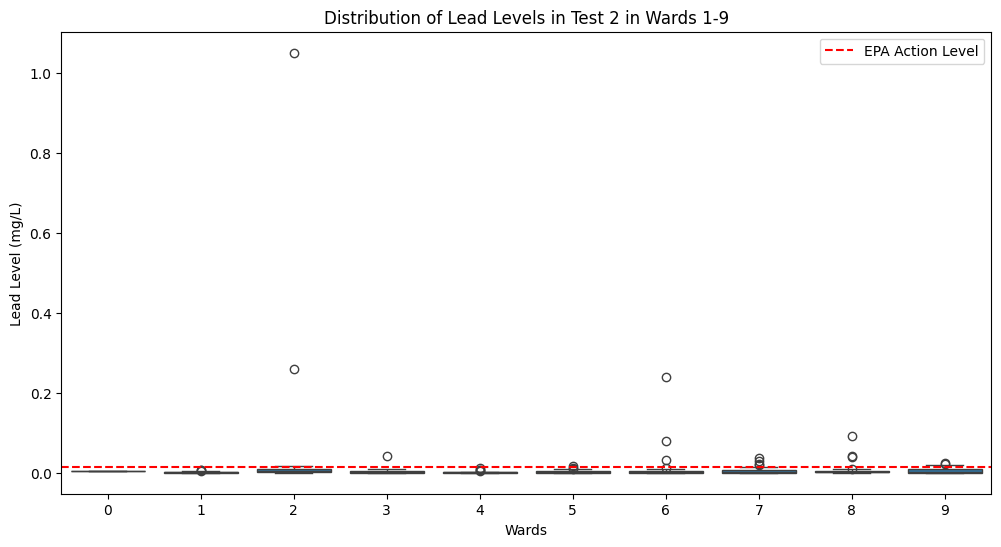

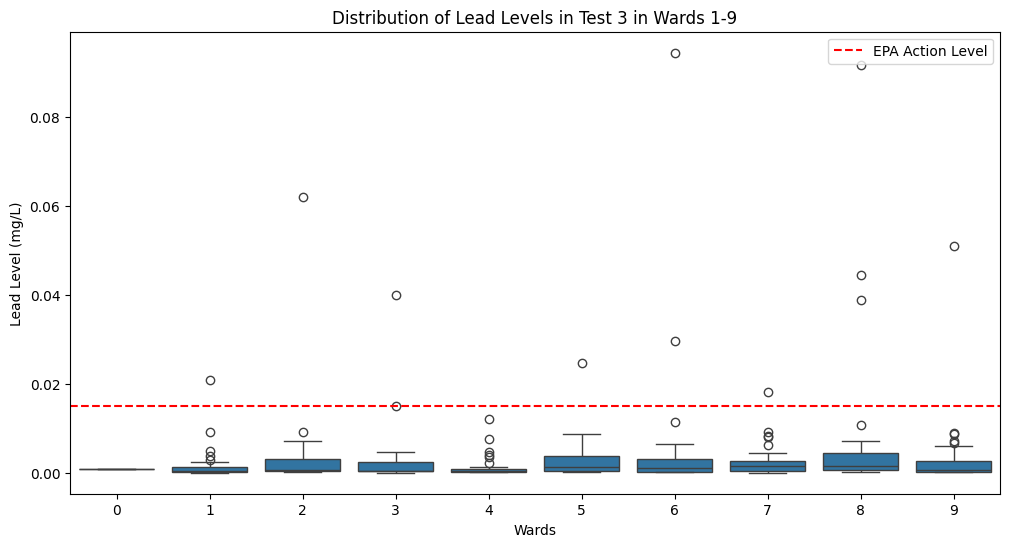

In [15]:
for i in range(1,4):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Ward', y=f'Pb Bottle {i} in mg/L', data=flint)
    plt.axhline(y=0.015, color='r', linestyle='--', label='EPA Action Level')
    plt.legend()
    plt.title(f'Distribution of Lead Levels in Test {i} in Wards 1-9')
    plt.xlabel('Wards')
    plt.ylabel('Lead Level (mg/L)')
    plt.show()

## Your results

What did you find when you compared the analysis with the outliers and without? 
What would your recommendations be to the organizations who were tackling the water crisis?
Did you find a particular ward or wards that needed more urgent action?

<font size=+2>&#9999;</font> When I removed the outliers, all of the values were below the EPA level of 0.015 mg/L. This means that the water in all of the wards is safe to drink. My recommendation to the organizations who were tackling the water crisis would be to continue monitoring the water levels in each ward to ensure that they remain below the EPA level. I did not find a particular ward that needed more urgent action because all of the wards had safe levels of lead in the water.

# Presenting your analysis

Put together a presentation, including graphics, that would help the organizations overseeing the water issues in Flint make a decision on how best to move forward. Your audience will include representatives from the EPA, city and state government, and concerned citizens.

You can create the presentation below using markdown cells and code. **Remember to include your recommendations based on your data!**

In the space below, type in your key learnings from this activity.

<font size="+2">&#9999;</font> I learned how to use masks in Pandas to determine if there are outliers in the data. I also learned how to analyze the data with and without outliers to determine if the water in each ward is safe to drink. I also learned how to use the IQR method to determine if there are outliers in the data.